# Temperature Prediction

In [1]:
import pandas as p
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

Detail of dataset
1. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
2. RH : Relative Humidity in %: 21 to 90
3. Ws :Wind speed in km/h: 6 to 29
4. Rain: total day in mm: 0 to 16.8
FWI Components
5. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
6. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
7. Drought Code (DC) index from the FWI system: 7 to 220.4
8. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
9. Buildup Index (BUI) index from the FWI system: 1.1 to 68
10. Fire Weather Index (FWI) Index: 0 to 31.1
11. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



In [2]:
#reading data set
df= p.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
#checking data types, As we can see their are  some columns with object data type but the are numerical
df.dtypes 

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [5]:
df.day.unique() #as we can see there are some string that are available in data set

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

In [6]:
df.loc[(df['day']=='Sidi-Bel Abbes Region Dataset') | (df['day']== 'day') ].index #we are dropping it

Int64Index([122, 123], dtype='int64')

In [7]:
df.drop(index=df.loc[(df['day']=='Sidi-Bel Abbes Region Dataset') | (df['day']== 'day') ].index,inplace=True) 

In [8]:
df.reset_index(drop=True,inplace=True) #Creating new index

In [9]:
df.rename(str.strip,axis=1,inplace=True) #stripping the columns

In [10]:
df.isnull().sum() #only one null value we can drop that

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [11]:
df.dropna(inplace=True) #dropped

In [12]:
df.isnull().sum().sum() #no null value

0

In [13]:
df.nunique() #checking number of unique values

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            165
DC             197
ISI            106
BUI            173
FWI            126
Classes          8
dtype: int64

In [14]:
#striping every data in the data set
for  i in df.columns:
    df[i]=df[i].map(lambda x:x.strip())

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [16]:
#converting data types of columns
def fn(x):
    for i in x.columns:
        if len(x[i].unique())<10:
            pass
        else:
            df[i]=df[i].astype('float')
    return x
fn(df)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,06,2012,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2.0,06,2012,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3.0,06,2012,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4.0,06,2012,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,5.0,06,2012,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,09,2012,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27.0,09,2012,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,28.0,09,2012,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29.0,09,2012,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


# Statistical Analysis

In [17]:
df.describe() 

,day,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


#We can check in which columns there is possibility of outliers

In [18]:
#checking correlation  of temp from here we can drop days month and year
df.corr()['Temperature']

day            0.097227
Temperature    1.000000
RH            -0.651400
Ws            -0.284510
Rain          -0.326492
FFMC           0.676568
DMC            0.485687
DC             0.376284
ISI            0.603871
BUI            0.459789
FWI            0.566670
Name: Temperature, dtype: float64

<AxesSubplot:>

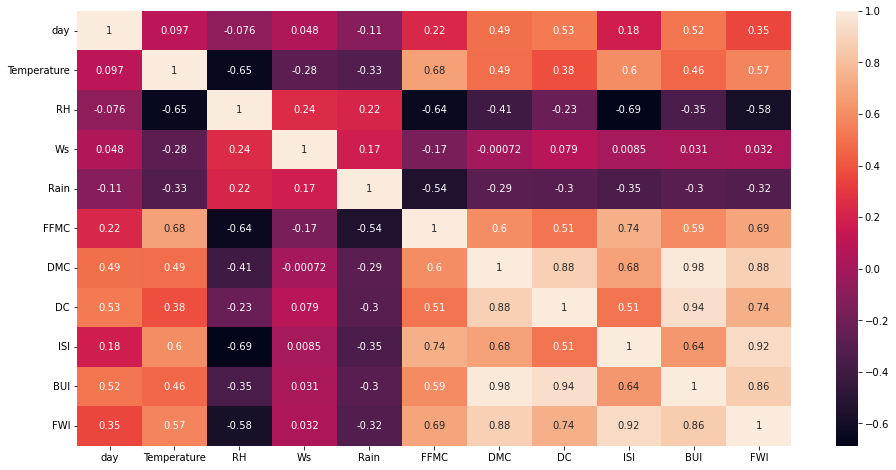

In [19]:
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(),annot=True)

FWI and ISI ,FFMC,RH are correlated

In [20]:
df.drop(columns=['day','month','year'],inplace=True) #dropped the clomuns

# Graphical analysis

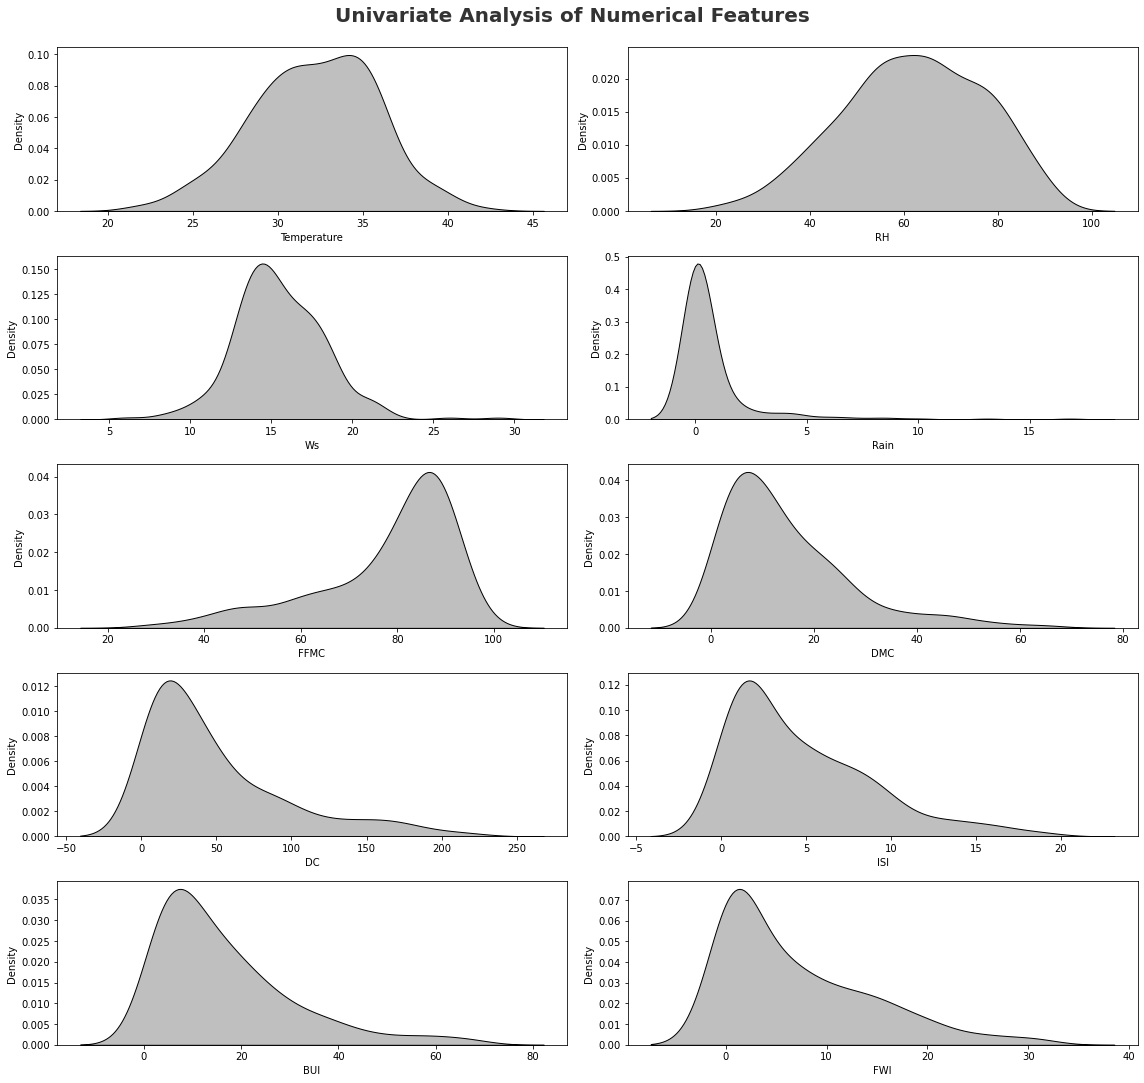

In [123]:
#univaritate analysis
num=[i for i in df.columns if df[i].dtype!='O']
cat= [i for i in df.columns if df[i].dtype=='O']
plt.figure(figsize = (16,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(len(num)):
    plt.subplot(5,2,i+1)
    sns.kdeplot(df[num[i]],shade=True,color='black')
    plt.tight_layout()
    

BUI,FWI,DC contain outlires4

<AxesSubplot:xlabel='Classes', ylabel='count'>

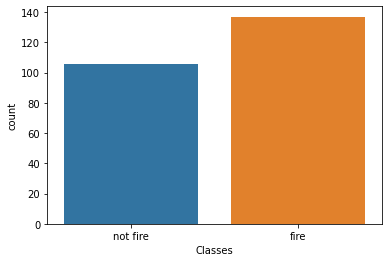

In [127]:
#analysis of categroical

sns.countplot(df[cat[0]])

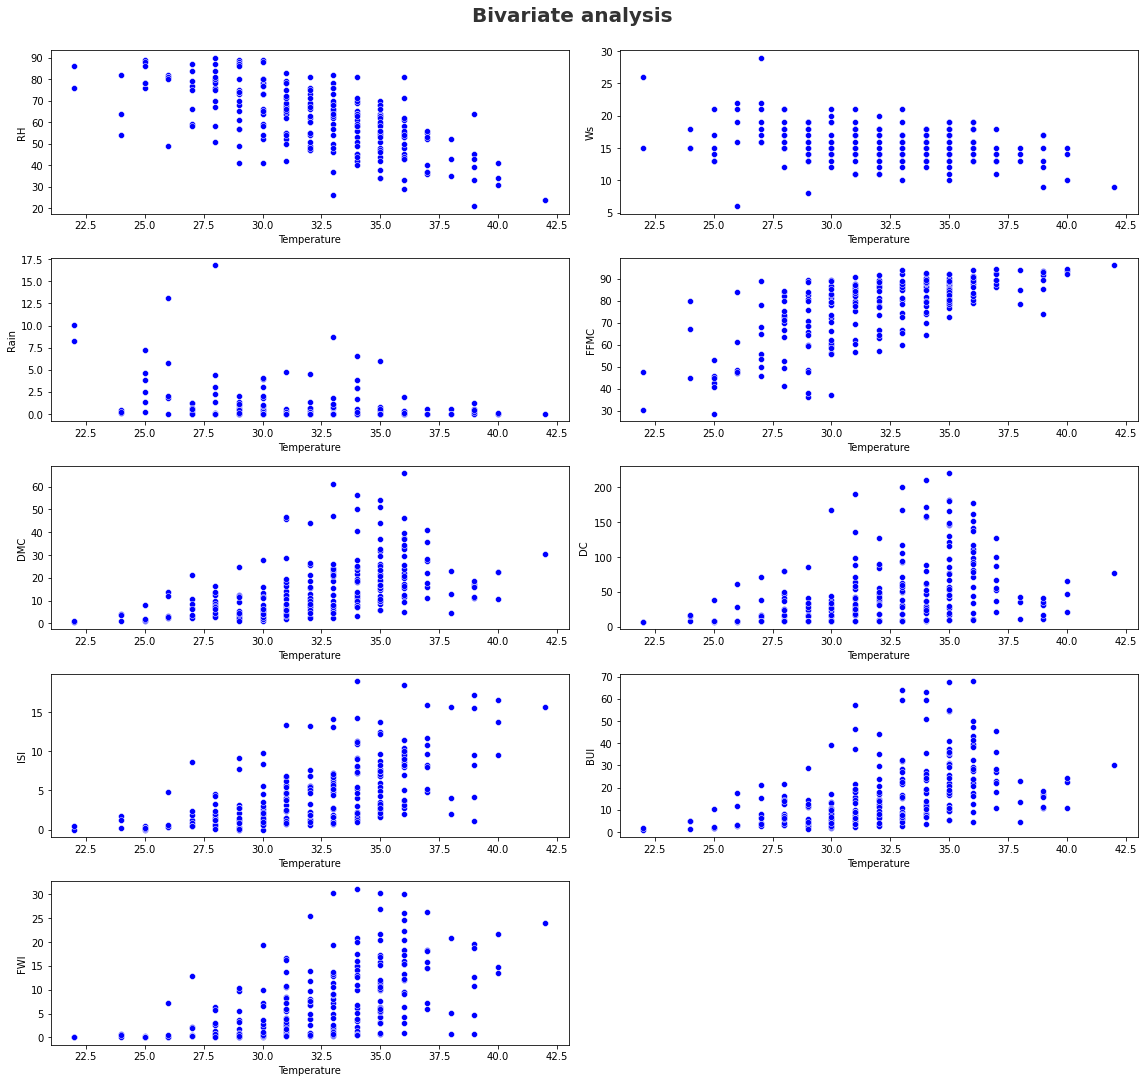

In [140]:
#bivariate analysis
plt.figure(figsize = (16,15))
plt.suptitle('Bivariate analysis',fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(1,len(num)):
    plt.subplot(5,2,i)
    sns.scatterplot(df['Temperature'],df[num[i]],color='b')
    plt.tight_layout()

#Rain,Ws is concentrated limited values
#RH increases temperature decrease
#FFMC,ISI,FWI increases temp also increases

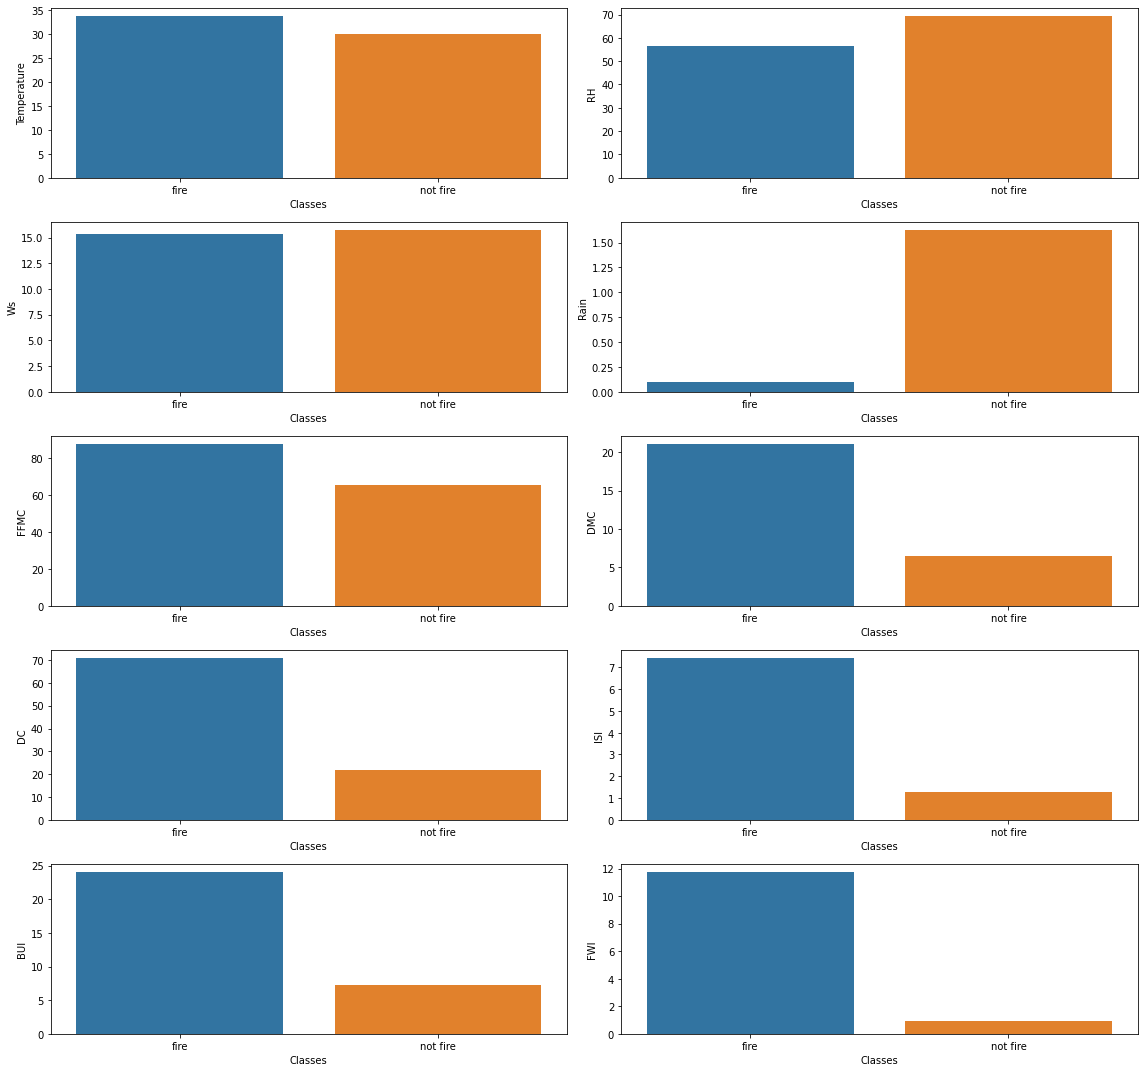

In [137]:
#bivariation with class
plt.figure(figsize = (16,15))
for i in range(len(num)):
    plt.subplot(5,2,i+1)
    sns.barplot(df.groupby('Classes')[num[i]].mean().index,df.groupby('Classes')[num[i]].mean())
    plt.tight_layout()

#Fire have not such impact on temperature


<AxesSubplot:>

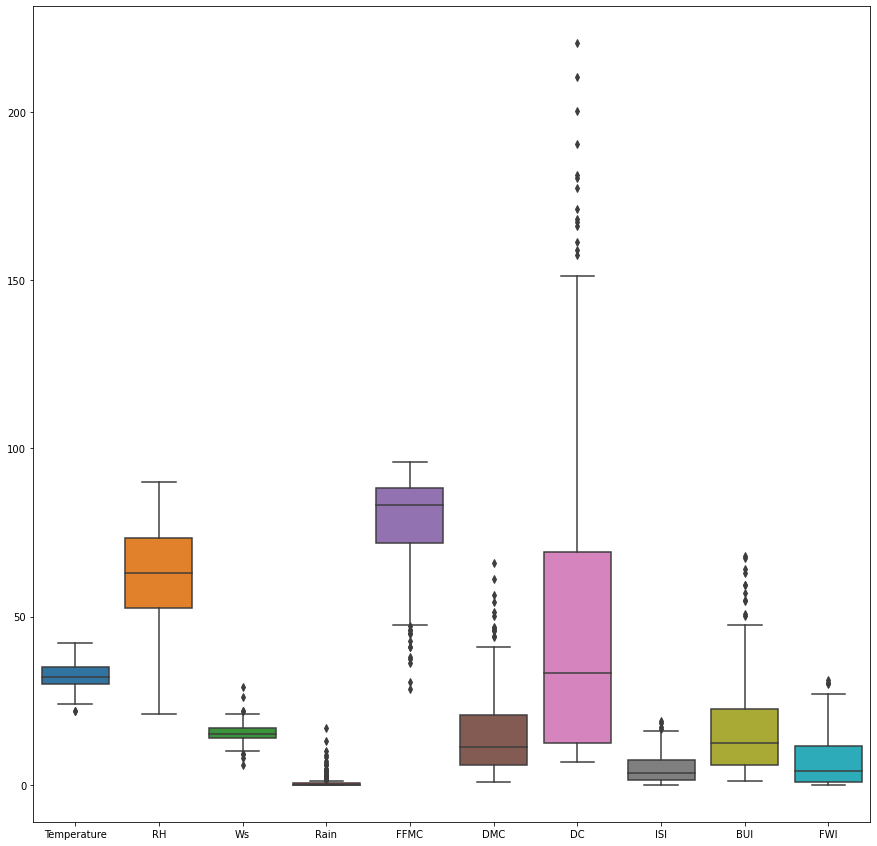

In [145]:
#Boxplot
plt.figure(figsize=(15,15))
sns.boxplot(data=df)

WE can clearly see the outliers  the dots are outliers 

# Spliting the Data

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Temperature',axis=1),df['Temperature'],test_size=0.33,random_state=42)

In [67]:
#encoding the categorical data
X_train=p.get_dummies(X_train,drop_first=True)
X_test=p.get_dummies(X_test,drop_first=True)

In [68]:
#ScalingTransforming the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainscaled=p.DataFrame(scaler.fit_transform(X_train.drop('Classes_not fire',axis=1)),columns=X_train.columns[:-1])
X_testcaled=p.DataFrame(scaler.transform(X_test.drop('Classes_not fire',axis=1)),columns=X_train.columns[:-1])

In [69]:
X_trainscaled['Classes_not fire']=X_train['Classes_not fire'].values
X_testcaled['Classes_not fire']=X_test['Classes_not fire'].values

# Linear regression

In [70]:
X_trainscaled.columns

Index(['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI',
       'Classes_not fire'],
      dtype='object')

In [126]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()

In [127]:
l.fit(X_trainscaled,y_train)

LinearRegression()

In [129]:
l.coef_ 
for i in range(len(X_trainscaled.columns)):
    print(f'Slope of {X_trainscaled.columns[i]} > {l.coef_[i]}')

Slope of RH > -1.1555413527199818
Slope of Ws > -0.6887024807015607
Slope of Rain > 0.3083715431336028
Slope of FFMC > 1.5594355785960894
Slope of DMC > 2.83334985400384
Slope of DC > 2.0730414029099076
Slope of ISI > 0.43522880344881154
Slope of BUI > -4.134890945771873
Slope of FWI > -0.4160356555424134
Slope of Classes_not fire > 0.3027641056997712


In [77]:
l.intercept_


31.9623346931106

In [79]:
p0=l.predict(X_trainscaled)
p1=l.predict(X_testcaled)

In [80]:
from sklearn.metrics import r2_score
print(r2_score(y_train,p0)) 
print(r2_score(y_test,p1))

0.5893831714034917
0.4816375264635766


48 percent mean this peecent of data in test follow the linear reation we got

In [81]:
#Adjusted R square 
1 - (1-r2_score(y_test,p1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.4075857445298019

In [82]:
#Perfromance matric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,p1))
print(mean_absolute_error(y_test,p1))
print(n.sqrt(mean_squared_error(y_test,p1)))

6.652673940201342
2.0571954394460117
2.5792777943062553


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

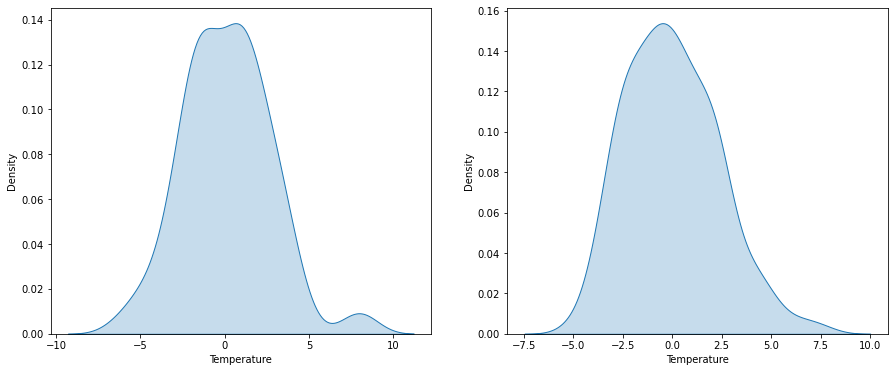

In [89]:
#Normal Distribution of  residual and concentrated at zero
r1=p1-y_test
r2=p0-y_train
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.kdeplot(r1,shade='blue')
plt.subplot(1,2,2)
sns.kdeplot(r2,shade='blue')

<AxesSubplot:ylabel='Temperature'>

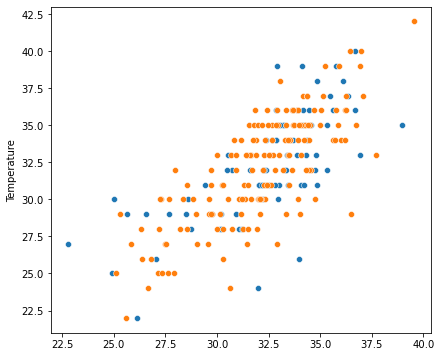

In [101]:
#linear relation between predicted and orignal values
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(p1,y_test)
sns.scatterplot(p0,y_train)

Text(0.5, 0, 'Predition')

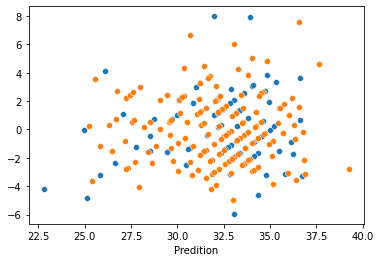

In [141]:
#Uniformity in residual 
r0=p0-y_train.values
r1=p1-y_test.values
sns.scatterplot(p1,r1)
sns.scatterplot(p0,r0)
plt.xlabel('Predition')
#showing no pattern 

# Ridge regression

It is done when we have overfitting condition.

In [109]:
from sklearn.linear_model import Ridge

In [131]:
R=Ridge()

In [132]:
R.fit(X_trainscaled,y_train)

Ridge()

In [133]:
R.intercept_ #intercept when all independent variables are zero the value of temperaute will be this

31.973674737466574

In [134]:
R.coef_ #slope of every independent variable
for i in range(len(X_trainscaled.columns)):
    print(f'Slope of {X_trainscaled.columns[i]} > {R.coef_[i]}')

Slope of RH > -1.164661542088207
Slope of Ws > -0.6918169555135564
Slope of Rain > 0.2759654184026174
Slope of FFMC > 1.48892904370655
Slope of DMC > 0.34238154342033783
Slope of DC > 0.730189753270905
Slope of ISI > 0.43914575663450256
Slope of BUI > -0.4232180834757775
Slope of FWI > -0.386024552964831
Slope of Classes_not fire > 0.2775985278139057


In [135]:
p0=R.predict(X_trainscaled) #predict value of train dataset
p1=R.predict(X_testcaled)   #predict value of test dataset

In [136]:
from sklearn.metrics import r2_score
print(r2_score(y_train,p0)) 
print(r2_score(y_test,p1))

0.5877406563999718
0.5072250693270144


Ridge model is more efficent then linear as R value is higher 

In [123]:
#Adjusted R square 
1 - (1-r2_score(y_test,p1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.436828650659445

Adjusted R sqaure is also higher in this case as compare to linear

In [130]:
#Assumption are same of linear variable

Text(0.5, 0, 'Prediction')

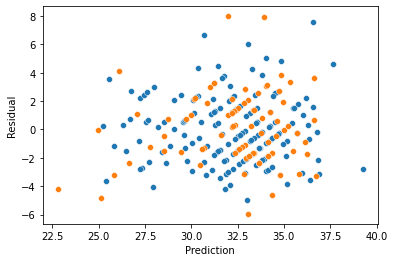

In [144]:
#uniform relation btw residual and prediction
r1=p0-y_train.values
r2=p1-y_test.values
sns.scatterplot(p0,r1)
sns.scatterplot(p1,r2)
plt.ylabel('Residual')
plt.xlabel('Prediction')

<AxesSubplot:ylabel='Temperature'>

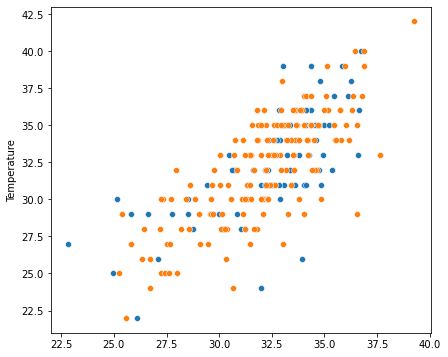

In [142]:
#linear relation between prediction and orignal
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(p1,y_test)
sns.scatterplot(p0,y_train)

In [148]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,p1))
print(mean_absolute_error(y_test,p1))
print(n.sqrt(mean_squared_error(y_test,p1)))

6.324282923698839
1.9887413429229979
2.5148127015145363


As we can see these all value are less in Ridge case as compare to linear regression

# Lasso Regression Model Prediction

In [150]:
from sklearn.linear_model import Lasso
l=Lasso()

In [151]:
l.fit(X_trainscaled,y_train)

Lasso()

In [154]:
l.intercept_ 

32.098765432098766

In [156]:
l.coef_
for i in range(len(X_trainscaled.columns)):
    print(f'Slope of {X_trainscaled.columns[i]} > {l.coef_[i]}')

Slope of RH > -0.7132238656558993
Slope of Ws > -0.0
Slope of Rain > -0.0
Slope of FFMC > 1.0466751018931308
Slope of DMC > 0.0
Slope of DC > 0.0
Slope of ISI > 0.0
Slope of BUI > 0.0
Slope of FWI > 0.0
Slope of Classes_not fire > -0.0


In [157]:
p0=l.predict(X_trainscaled)
p1=l.predict(X_testcaled)

Text(0.5, 0, 'Prediction')

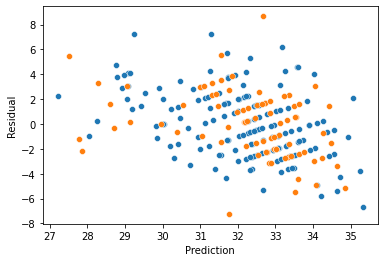

In [158]:
#Assumption
#uniform relation btw residual and prediction
r1=p0-y_train.values
r2=p1-y_test.values
sns.scatterplot(p0,r1)
sns.scatterplot(p1,r2)
plt.ylabel('Residual')
plt.xlabel('Prediction')

<AxesSubplot:ylabel='Temperature'>

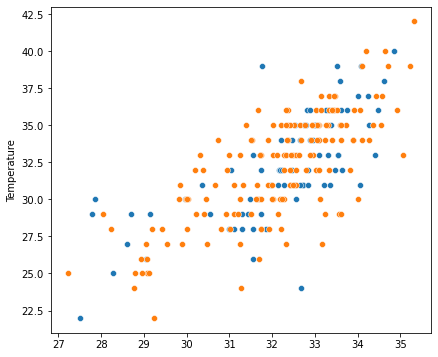

In [159]:
#linear relation between prediction and orignal
plt.figure(figsize=(15,6))
sns.scatterplot(p1,y_test)
sns.scatterplot(p0,y_train)

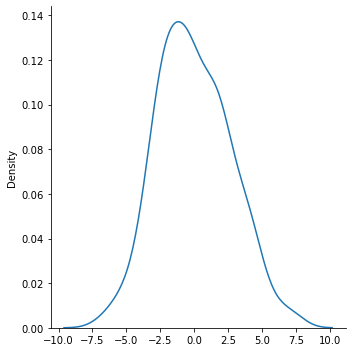

In [163]:
sns.displot(r1,kind='kde')

In [164]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,p1))
print(mean_absolute_error(y_test,p1))
print(n.sqrt(mean_squared_error(y_test,p1)))

7.177068723026321
2.144527529507031
2.6790051741320546


In [165]:
from sklearn.metrics import r2_score
print(r2_score(y_train,p0)) 
print(r2_score(y_test,p1))

0.4585783739103134
0.44077777906304116


In [166]:
#Adjusted R square 
1 - (1-r2_score(y_test,p1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.3608888903577614

# Elastic Net Regression Model Prediction

In [167]:
from sklearn.linear_model import ElasticNet

In [168]:
E=ElasticNet()

In [169]:
E.fit(X_trainscaled,y_train)

ElasticNet()

In [170]:
E.intercept_

32.098765432098766

In [172]:
E.coef_
for i in range(len(X_trainscaled.columns)):
    print(f'Slope of {X_trainscaled.columns[i]} > {E.coef_[i]}')

Slope of RH > -0.6755227693727399
Slope of Ws > -0.2043099677753696
Slope of Rain > -0.0
Slope of FFMC > 0.7546267664272617
Slope of DMC > 0.08978222042097725
Slope of DC > 0.0
Slope of ISI > 0.2515192853809093
Slope of BUI > 0.061825270490957186
Slope of FWI > 0.16908883512773978
Slope of Classes_not fire > -0.0


In [173]:
p0=E.predict(X_trainscaled)
p1=E.predict(X_testcaled)

Text(0.5, 0, 'Prediction')

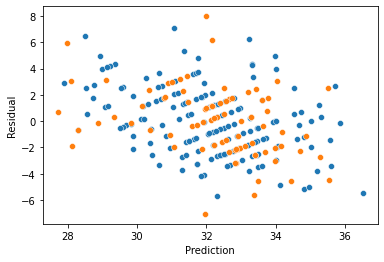

In [174]:
#Assumption
#uniform relation btw residual and prediction
r1=p0-y_train.values
r2=p1-y_test.values
sns.scatterplot(p0,r1)
sns.scatterplot(p1,r2)
plt.ylabel('Residual')
plt.xlabel('Prediction')

<AxesSubplot:ylabel='Temperature'>

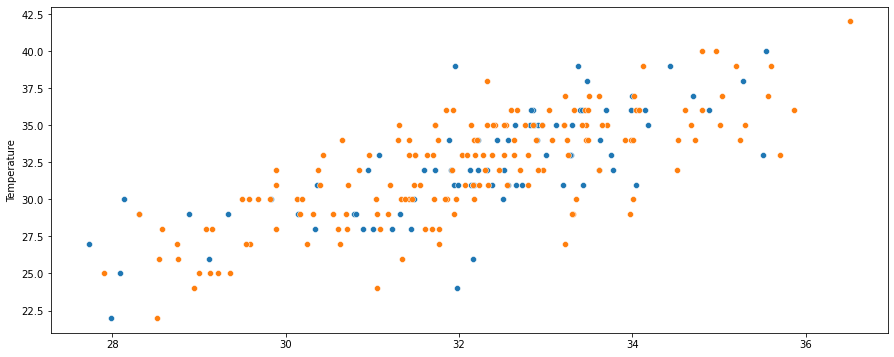

In [175]:
#linear relation between prediction and orignal
plt.figure(figsize=(15,6))
sns.scatterplot(p1,y_test)
sns.scatterplot(p0,y_train)

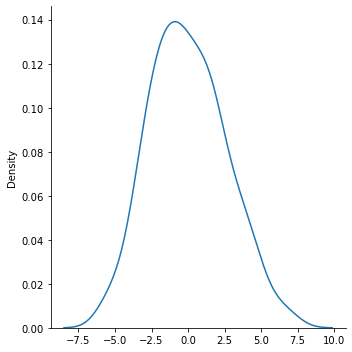

In [176]:
sns.displot(r1,kind='kde')

In [177]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,p1))
print(mean_absolute_error(y_test,p1))
print(n.sqrt(mean_squared_error(y_test,p1)))

6.650821290264135
2.0377628162152055
2.5789186280811838


In [178]:
from sklearn.metrics import r2_score
print(r2_score(y_train,p0)) 
print(r2_score(y_test,p1))

0.4955809657538943
0.48178188108138587


In [179]:
#Adjusted R square 
1 - (1-r2_score(y_test,p1))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.40775072123586953